In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#load data from Google Drive
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv('/content/drive/My Drive/Year-Make-Model-Trim-Basic-Specs-new-cars-only-by-Teoalida.csv')

#Since I am only interested in gas vehicles, drop all diesel, hybrid, electric, etc vehicles
df=df[df['Engine type']=='gas']

#Use only the columns I am interested in
df=df[['Make', 'Model', 'Year', 'Length (in)', 'Width (in)', 'Height (in)', 'Curb weight (lbs)', 'Combined MPG', 'EPA mileage (mpg)', 'Engine size (l)', 'Horsepower (HP)', 'Torque (ft-lbs)']]

#drop rows with null values
df=df.dropna()

#define and apply functions to select the highway and city gas mileages from the EPA mileage column, where they are together in one string
def highway_mileage(string):
  return string.split('/')[1].split()[0]
def city_mileage(string):
  return string.split('/')[0]
df['City MPG']=pd.to_numeric(df['EPA mileage (mpg)'].apply(city_mileage))
df['Highway MPG']=pd.to_numeric(df['EPA mileage (mpg)'].apply(highway_mileage))
df.drop('EPA mileage (mpg)', axis=1)

#Since the original data has separate rows for separate trim levels, combine all trim levels into a single row by averaging numbers
df=df.groupby(['Make', 'Model', 'Year']).mean()

#Rename the columns to not have spaces, so as not to mess up the regression functions
df.columns=['Length', 'Width', 'Height', 'Weight', 'Combined_MPG', 'Engine', 'HP', 'Torque', 'City_MPG', 'Highway_MPG']

print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(898, 10)


Length  Width  Height  ...  Torque   City_MPG  Highway_MPG
Make  Model Year                         ...                                
Acura ILX   2018   181.9   70.6    55.6  ...   180.0  25.000000    35.000000
            2019   182.2   70.6    55.6  ...   180.0  24.000000    34.000000
            2020   182.2   70.6    55.6  ...   180.0  24.000000    34.000000
      MDX   2018   196.2   77.8    67.4  ...   267.0  18.900000    26.500000
            2019   196.2   77.7    67.4  ...   267.0  19.454545    26.363636

[5 rows x 10 columns]

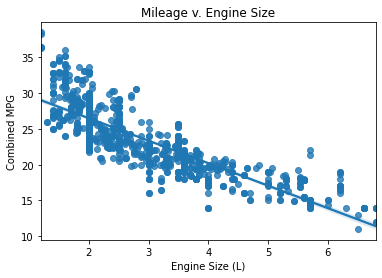

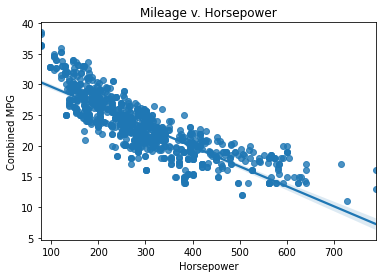

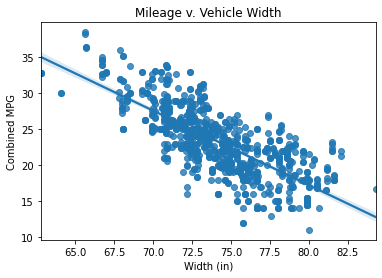

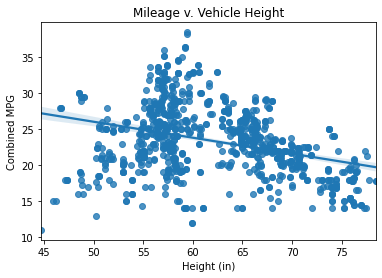

In [83]:
#sns.pairplot(df, x_vars=['Highway_MPG', 'Engine', 'HP', 'Torque'], y_vars='Highway_MPG')

ax=sns.regplot(x='Engine', y='Combined_MPG', data=df)
plt.ylabel('Combined MPG')
plt.xlabel('Engine Size (L)')
plt.title("Mileage v. Engine Size")
plt.show()

ax=sns.regplot(x='HP', y='Combined_MPG', data=df)
plt.ylabel('Combined MPG')
plt.xlabel('Horsepower')
plt.title("Mileage v. Horsepower")
plt.show()

ax=sns.regplot(x='Width', y='Combined_MPG', data=df)
plt.ylabel('Combined MPG')
plt.xlabel('Width (in)')
plt.title("Mileage v. Vehicle Width")
plt.show()

ax=sns.regplot(x='Height', y='Combined_MPG', data=df)
plt.ylabel('Combined MPG')
plt.xlabel('Height (in)')
plt.title("Mileage v. Vehicle Height")
plt.show()


In [84]:
from statsmodels.formula.api import ols

model=ols('Combined_MPG ~ Engine + HP + Width + Height', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Combined_MPG   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1185.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        05:02:23   Log-Likelihood:                -1858.5
No. Observations:                 898   AIC:                             3727.
Df Residuals:                     893   BIC:                             3751.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4886      1.844     29.010      0.0

In [85]:
#Ford Transit - 81.3 wide, 109.6 high, 3.5l engine, 262 ft-lbs torque, 275 horsepower
print('Ford Transit: '+str(model.params.dot([[1],[3.5],[275],[81.3],[108.6]])[0]))

#Ram Promaster - 3.6l engine, 260 lbs-ft torque, 80.7 wide, 99.4 high, 280 horsepower
print('Ram Promaster: '+str(model.params.dot([[1],[3.6],[280],[80.7],[99.4]])[0]))

#Nissan NV - 4l engine, 281 lbs-ft torque, 79.9 wide, 105 high, 261 horsepower
print('Nissan NV: '+str(model.params.dot([[1],[4],[261],[79.9],[105]])[0]))

Ford Transit: 14.385244574719895
Ram Promaster: 15.867178993933507
Nissan NV: 15.146636201383735
